<a href="https://colab.research.google.com/github/Sebastiao199/Project5TimeSeries/blob/main/Correlation_Rent_Lx_Sf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
pip install dtw-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
import pandas as pd
import numpy as np
from dtw import *
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

In [126]:
rent_sf = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project5TimeSeries/main/rent_index_sf.csv')
rent_sf

,Unnamed: 0,Rent Index
0,2015-03-31,2411.441275
1,2015-04-30,2436.507086
2,2015-05-31,2465.454228
3,2015-06-30,2495.946833
4,2015-07-31,2527.277444
...,...,...
88,2022-07-31,3166.525685
89,2022-08-31,3176.060028
90,2022-09-30,3172.722698
91,2022-10-31,3160.365782


In [127]:
rent_lx = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project5TimeSeries/main/idealista_df_rent.csv')
rent_lx

,Date,Rent_Squared_Meter_Price
0,2022-12-01,18.0
1,2022-11-01,17.3
2,2022-10-01,16.7
3,2022-09-01,15.7
4,2022-08-01,15.2
5,2022-07-01,14.9
6,2022-06-01,14.5
7,2022-05-01,14.2
8,2022-04-01,13.9
9,2022-03-01,13.8


In [128]:
type(rent_sf['Rent Index'][0])

numpy.float64

In [129]:
type(rent_lx['Rent_Squared_Meter_Price'][0])

numpy.float64

In [130]:
def dtw1(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

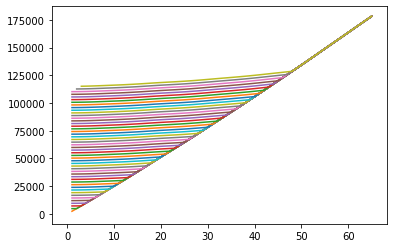

In [131]:
## Find the best match with the canonical recursion formula
# keep_internals=True,
alignment1 = dtw1(rent_sf['Rent Index'], rent_lx['Rent_Squared_Meter_Price'],  window=45)
# alignment
## Display the warping curve, i.e. the alignment curve
# alignment.plot(type="threeway")
plt.plot(alignment1) 

In [132]:
alignment1.shape

(94, 49)

In [133]:
alignment1

array([[     0.        ,             inf,             inf, ...,
                    inf,             inf,             inf],
       [            inf,   2393.4412752 ,   4787.5825504 , ...,
        110259.19865923,             inf,             inf],
       [            inf,   4811.94836151,   4812.64836151, ...,
        110284.26447033, 112680.00574553,             inf],
       ...,
       [            inf,             inf,             inf, ...,
                    nan,             nan,             nan],
       [            inf,             inf,             inf, ...,
                    inf,             nan,             nan],
       [            inf,             inf,             inf, ...,
                    inf,             inf,             nan]])

In [134]:
arr1 = np.array([[10, 20], [11, 21], [12, 22]])
dimensions = arr1.shape
dimensions

(3, 2)

In [135]:
def dtw2(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

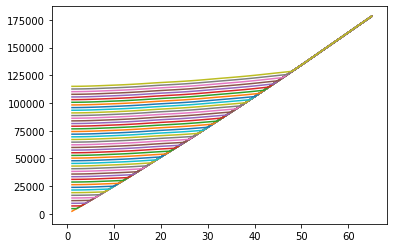

In [136]:
alignment2 = dtw2(rent_sf['Rent Index'], rent_lx['Rent_Squared_Meter_Price'])
plt.plot(alignment2) 

In [137]:
rent_sf.iloc[45:,:]['Rent Index']

45    2863.548131
46    2863.728628
47    2870.964043
48    2885.666916
49    2902.021304
50    2918.250049
51    2936.141475
52    2953.476368
53    2960.874516
54    2957.883245
55    2944.523906
56    2938.105286
57    2935.248292
58    2949.567450
59    2962.313032
60    2969.634072
61    2960.880912
62    2946.519396
63    2926.574265
64    2903.605888
65            NaN
66            NaN
67    2750.918338
68    2729.885512
69    2712.612069
70    2714.698841
71    2716.400271
72    2750.545718
73    2778.348713
74    2821.116468
75    2865.647399
76    2923.142507
77    2966.649926
78    2985.476105
79    2985.695720
80    2985.495023
81    2999.470964
82    3013.767318
83    3037.240807
84    3063.347439
85    3092.663578
86    3123.904757
87    3144.968002
88    3166.525685
89    3176.060028
90    3172.722698
91    3160.365782
92    3137.586626
Name: Rent Index, dtype: float64

In [138]:
# alignment = dtw(rent_sf.iloc[45:,:]['Rent Index'], rent_lx['Rent_Squared_Meter_Price'])


## Display the warping curve, i.e. the alignment curve

# alignment.plot(type="threeway")

In [139]:
# plt.plot(alignment.index1, alignment.index2) 

In [140]:
# rent_sf['Rent Index'] = rent_sf['Rent Index'].fillna(rent_sf['Rent Index'].mean())

In [141]:
rent_sf['Rent Index'] = rent_sf['Rent Index'].interpolate(method='nearest')

In [142]:
rent_sf_without_date = rent_sf['Rent Index']

In [143]:
rent_sf_without_date

0     2411.441275
1     2436.507086
2     2465.454228
3     2495.946833
4     2527.277444
         ...     
88    3166.525685
89    3176.060028
90    3172.722698
91    3160.365782
92    3137.586626
Name: Rent Index, Length: 93, dtype: float64

In [144]:
rent_lx_without_date = rent_lx['Rent_Squared_Meter_Price']

In [145]:
rent_lx_without_date

0     18.0
1     17.3
2     16.7
3     15.7
4     15.2
5     14.9
6     14.5
7     14.2
8     13.9
9     13.8
10    13.8
11    13.5
12    13.4
13    13.4
14    13.3
15    13.2
16    13.3
17    13.2
18    13.3
19    13.3
20    13.4
21    13.6
22    13.6
23    13.7
24    13.8
25    13.7
26    13.8
27    14.0
28    14.2
29    14.4
30    14.5
31    14.8
32    15.0
33    15.0
34    15.0
35    15.0
36    15.0
37    15.1
38    15.1
39    14.9
40    14.8
41    15.0
42    15.2
43    15.4
44    15.6
45    15.6
46    15.7
47    15.8
Name: Rent_Squared_Meter_Price, dtype: float64

In [146]:
arr_sf = rent_sf_without_date.to_numpy()
type(arr_sf)

numpy.ndarray

In [147]:
arr_lx = rent_lx_without_date.to_numpy()
type(arr_lx)

numpy.ndarray

In [148]:
#.iloc[45:,:]
alignment_euclidian = dtw(arr_sf, arr_lx, dist_method='euclidean')
alignment_euclidian

DTW alignment object of size (query x reference): 93 x 48

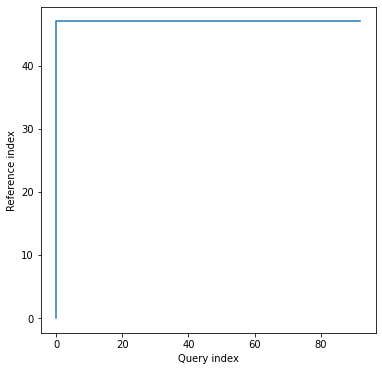

In [149]:
alignment_euclidian.plot()

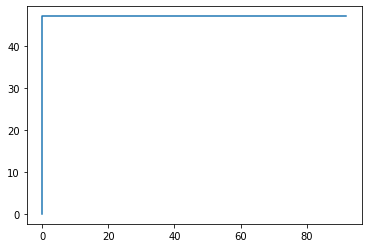

In [150]:
plt.plot(alignment_euclidian.index1, alignment_euclidian.index2) 

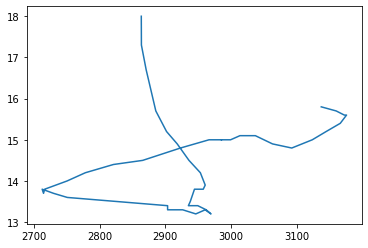

In [151]:
plt.plot(arr_sf[45:], arr_lx) 

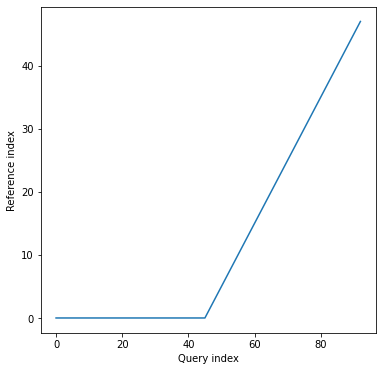

In [152]:
alignment_cosine = dtw(arr_sf, arr_lx, dist_method='cosine')
alignment_cosine.plot()

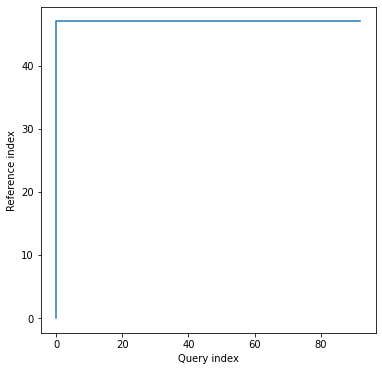

In [153]:
alignment_chebyshev = dtw(arr_sf, arr_lx, dist_method='chebyshev')
alignment_chebyshev.plot()

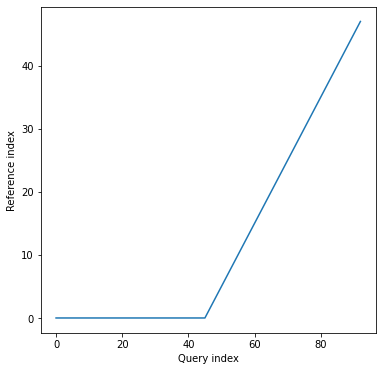

In [154]:
alignment_matching = dtw(arr_sf, arr_lx, dist_method='matching')
alignment_matching.plot()

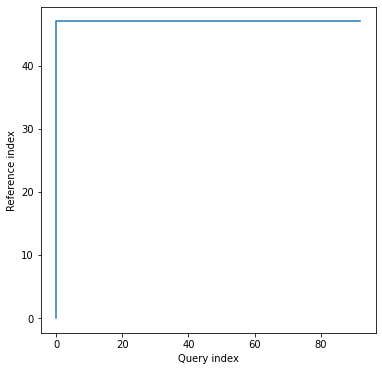

In [155]:
alignment_minkowski = dtw(arr_sf, arr_lx, dist_method='minkowski')
alignment_minkowski.plot()

In [156]:
list_index_lx = list(range(0,46))
# list_index_sf = list(range(48,94))

def check_correlations(lx_index):
  x=48
  intermediate_dictionary = {'Lisboa':rent_lx['Rent_Squared_Meter_Price'], 'SanFrancisco':rent_sf_without_date[lx_index:x+lx_index]}

#rent_lx_without_date
  # Convert dictionary to Pandas dataframe
  pandas_dataframe = pd.DataFrame(intermediate_dictionary)

  return pandas_dataframe.corr().iloc[0,1]

result = list(map(check_correlations, list_index_lx))
result

[-0.0357494783500058,
 0.14653259883795303,
 0.3425952024853235,
 0.536833752356384,
 0.6634954696873022,
 0.7502891647561227,
 0.8143458792697964,
 0.8534473275745559,
 0.8763428789713444,
 0.8897041657533817,
 0.9028112784523747,
 0.9187923124731892,
 0.9226651139315896,
 0.921600491154262,
 0.9185446670067083,
 0.914022559028359,
 0.9116421789452392,
 0.9114604441663078,
 0.9159024430629285,
 0.9151847365791799,
 0.9100555094268199,
 0.8991743308928872,
 0.8868763179566997,
 0.8698483072011816,
 0.8489014668479831,
 0.8225335975771653,
 0.7813423192333218,
 0.7348509059327368,
 0.6981755197210826,
 0.6760392741145882,
 0.6546204744959538,
 0.6292711007269061,
 0.5948094605907812,
 0.5800911606677784,
 0.5666757075292075,
 0.5513023114554635,
 0.5326612314310687,
 0.5040382351512562,
 0.5526366147098618,
 0.6650099992576648,
 0.6515897708949578,
 0.16409420750623835,
 0.01048555327610565,
 0.3228723690512392,
 0.8725652590693241,
 0.8764948696816334]

In [157]:
corr_sf_lx = pd.DataFrame(result,columns=['Correlation'])

In [158]:
corr_sf_lx['Correlation'].max()

0.9226651139315896

In [159]:
max_corr = corr_sf_lx[corr_sf_lx['Correlation'] == 0.9226651139315896]
max_corr

,Correlation
12,0.922665


In [160]:
rent_sf_without_date[max_corr.index[0]:48+max_corr.index[0]]

12    2616.602008
13    2636.389729
14    2653.247408
15    2671.225156
16    2686.131598
17    2690.914631
18    2678.370648
19    2662.438453
20    2646.827410
21    2638.035177
22    2636.607882
23    2652.111186
24    2674.308824
25    2693.931133
26    2715.436425
27    2741.010606
28    2760.783729
29    2769.405761
30    2772.664581
31    2770.325963
32    2763.293903
33    2755.446073
34    2759.760799
35    2767.565824
36    2780.941200
37    2795.510199
38    2815.231252
39    2834.334806
40    2851.226081
41    2864.483708
42    2867.444719
43    2866.866352
44    2863.827186
45    2863.548131
46    2863.728628
47    2870.964043
48    2885.666916
49    2902.021304
50    2918.250049
51    2936.141475
52    2953.476368
53    2960.874516
54    2957.883245
55    2944.523906
56    2938.105286
57    2935.248292
58    2949.567450
59    2962.313032
Name: Rent Index, dtype: float64

In [161]:
max_corr_df = pd.merge(rent_sf['Unnamed: 0'], rent_sf_without_date[max_corr.index[0]:48+max_corr.index[0]], left_index=True, right_index=True)
max_corr_df

,Unnamed: 0,Rent Index
12,2016-03-31,2616.602008
13,2016-04-30,2636.389729
14,2016-05-31,2653.247408
15,2016-06-30,2671.225156
16,2016-07-31,2686.131598
17,2016-08-31,2690.914631
18,2016-09-30,2678.370648
19,2016-10-31,2662.438453
20,2016-11-30,2646.827410
21,2016-12-31,2638.035177


In [162]:
px.line(max_corr_df, x="Unnamed: 0", y="Rent Index", title='Rent Index in San Francisco on the highest correlation with Lisboa interval')

In [163]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=max_corr_df['Unnamed: 0'], y=max_corr_df['Rent Index'],
                    mode='lines',
                    name='San Francisco'))
fig.add_trace(go.Scatter(x=rent_lx['Date'], y=rent_lx['Rent_Squared_Meter_Price'],
                    mode='lines',
                    name='Lisboa'))
fig.show()

In [164]:
fig=make_subplots(
        specs=[[{"secondary_y": True}]])
# print(fig.layout)    

fig.update_layout(xaxis2= {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
                   yaxis_domain=[0, 0.94]);

fig.add_trace(
    go.Scatter(x=max_corr_df['Unnamed: 0'], 
           y=max_corr_df['Rent Index'],
           mode='lines',
           name="San Francisco",
          ), secondary_y=False)

fig.add_trace(
    go.Scatter(x=rent_lx['Date'],
               y=rent_lx['Rent_Squared_Meter_Price'],
               mode='lines',
               name="Lisboa",
               line_color="#ee0000"), secondary_y=True)
fig.data[1].update(xaxis='x2')
fig.update_layout(width=700, height=475)

In [165]:
pd.concat([max_corr_df['Rent Index'], rent_lx['Rent_Squared_Meter_Price']], axis=1).corr()

,Rent Index,Rent_Squared_Meter_Price
Rent Index,1.000000,0.922665
Rent_Squared_Meter_Price,0.922665,1.000000


In [166]:
sf_zscore = stats.zscore(max_corr_df['Rent Index'])
# sf_zscore

In [167]:
lx_zscore = stats.zscore(rent_lx['Rent_Squared_Meter_Price'])
# lx_zscore

In [168]:
fig=make_subplots(
        specs=[[{"secondary_y": True}]])
# print(fig.layout)    

fig.update_layout(xaxis2= {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
                   yaxis_domain=[0, 0.94]);

fig.add_trace(
    go.Scatter(x=max_corr_df['Unnamed: 0'],
           y=sf_zscore,
           mode='lines',
           name="San Francisco",
          ), secondary_y=False)
fig.add_trace(
    go.Scatter(x=rent_lx['Date'],
               y=lx_zscore,
               mode='lines',
               name="Lisboa",
               line_color="#ee0000"), secondary_y=True)
fig.data[1].update(xaxis='x2')
fig.update_layout(width=700, height=475)

In [169]:
# sf_zscore_df = pd.DataFrame(sf_zscore)
# sf_zscore_df['Date'] = max_corr_df['Unnamed: 0']
# sf_zscore_df['Date']= pd.to_datetime(sf_zscore_df['Date']).dt.strftime('%Y-%m-%d')
# sf_zscore_df.set_index('Date', inplace=True)
# sf_zscore_df

In [170]:
# lx_zscore['Date'] = rent_lx['Date']
# lx_zscore.index = lx_zscore['Date']

# lx_zscore_df = pd.DataFrame(lx_zscore)
# lx_zscore_df['Date'] = rent_lx['Date']
# lx_zscore_df['Date']= pd.to_datetime(lx_zscore_df['Date']).dt.strftime('%Y-%m-%d')
# lx_zscore_df.set_index('Date', inplace=True)

In [171]:
## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
#keep_internals=True
dtw(sf_zscore_df, lx_zscore_df, dist_method='euclidean', step_pattern=rabinerJuangStepPattern(6, "c")).plot(type="twoway", offset=-2)

ValueError: ignored

In [ ]:
dtw(max_corr_df, rent_lx, step_pattern=rabinerJuangStepPattern(6, "c")).plot(type="twoway",offset=-2)

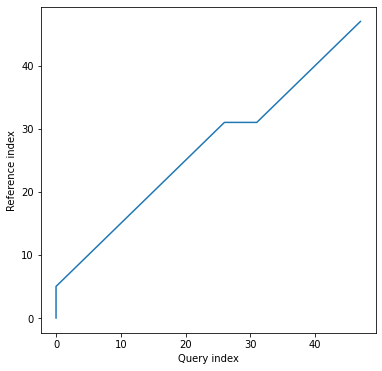

In [172]:
alignment_cosine = dtw(sf_zscore, lx_zscore, dist_method='cosine')
alignment_cosine.plot()

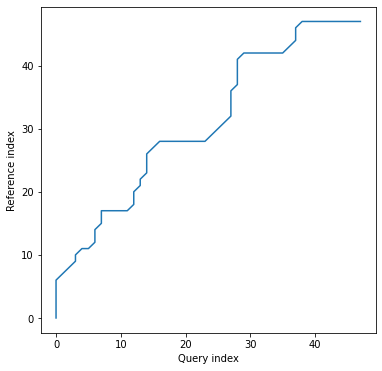

In [173]:
alignment_cosine = dtw(sf_zscore, lx_zscore, dist_method='euclidean')
alignment_cosine.plot()

In [ ]:
alignment_cosine = dtw(sf_zscore, lx_zscore, dist_method='chebyshev')
alignment_cosine.plot()

In [ ]:
alignment_cosine = dtw(sf_zscore, lx_zscore, dist_method='matching')
alignment_cosine.plot()

In [ ]:
alignment_cosine = dtw(sf_zscore, lx_zscore, dist_method='minkowski')
alignment_cosine.plot()

In [ ]:
plt.plot(result)